#Predicting Income 

##Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year.

Source: https://archive.ics.uci.edu/ml/datasets/Census+Income

##List of Attributes:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

##Importing Data

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [12]:
%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
train = pd.read_csv("adult.data.txt", header=None, index_col=False, names=columns, sep=',\s', na_values=["?"])
#Some values were "?". The last two inputs sees to it that they are turned into NaN values for easier manipulation

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [67]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,nulls
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [4]:
test = pd.read_csv("adult.test.txt", header=None, index_col=False, names=columns, sep=',\s', na_values=["?"])

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [5]:
test = test.ix[1:]

In [6]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


##Exploring Data

####Finding nulls per row

Find amount of nulls for each row. Later, could delete rows with certain number of nulls to see if it helps increase modeling eficiency.

In [7]:
train_nulls = train.isnull().sum(axis=1).tolist()
train['nulls'] = train_nulls

In [8]:
#train[train['nulls']>2]
#Use to delete rows with 3 or more null values

####Info on each column

In [9]:
print(train.describe())

                age          fnlwgt  education-num  capital-gain  \
count  32561.000000    32561.000000   32561.000000  32561.000000   
mean      38.581647   189778.366512      10.080679   1077.648844   
std       13.640433   105549.977697       2.572720   7385.292085   
min       17.000000    12285.000000       1.000000      0.000000   
25%       28.000000   117827.000000       9.000000      0.000000   
50%       37.000000   178356.000000      10.000000      0.000000   
75%       48.000000   237051.000000      12.000000      0.000000   
max       90.000000  1484705.000000      16.000000  99999.000000   

       capital-loss  hours-per-week         nulls  
count  32561.000000    32561.000000  32561.000000  
mean      87.303830       40.437456      0.130893  
std      402.960219       12.347429      0.479434  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000    

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
nulls             32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


Note: The only columns with missing data are workclass, occupation, and native-country

####Age

In [ ]:
# plt.hist(train['age'])
# plt.show()

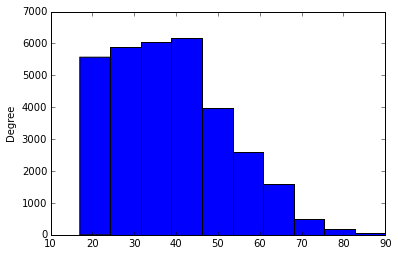

In [14]:
train['age'].plot(kind='hist')

####Workclass

In [73]:
workclasses = train['workclass'].unique().tolist()
workclasses

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 nan,
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [74]:
for item in workclasses:
    print(item,":", len(train['workclass'][train['workclass'] == item]))

State-gov : 1298
Self-emp-not-inc : 2541
Private : 22696
Federal-gov : 960
Local-gov : 2093
nan : 0
Self-emp-inc : 1116
Without-pay : 14
Never-worked : 7


####fnlwgt

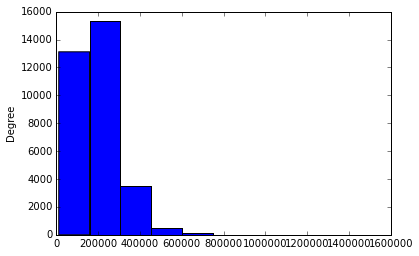

In [17]:
train['fnlwgt'].plot(kind='hist')

####Education

In [23]:
education = train['education'].unique().tolist()
for item in education:
    print(item,":", len(train['education'][train['education'] == item]))

Bachelors : 5355
HS-grad : 10501
11th : 1175
Masters : 1723
9th : 514
Some-college : 7291
Assoc-acdm : 1067
Assoc-voc : 1382
7th-8th : 646
Doctorate : 413
Prof-school : 576
5th-6th : 333
10th : 933
1st-4th : 168
Preschool : 51
12th : 433


####Education Number

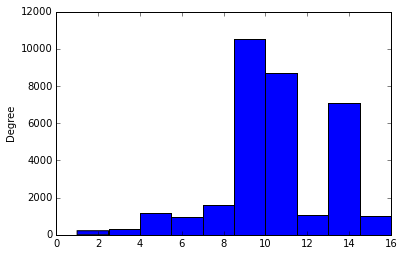

In [20]:
train['education-num'].plot(kind='hist')

####Marital Status

In [24]:
statuses = train['marital-status'].unique().tolist()
for item in statuses:
    print(item,":", len(train['marital-status'][train['marital-status'] == item]))

Never-married : 10683
Married-civ-spouse : 14976
Divorced : 4443
Married-spouse-absent : 418
Separated : 1025
Married-AF-spouse : 23
Widowed : 993


####Occupation

In [76]:
occupations = train['occupation'].unique().tolist()
for item in occupations:
    print(item,":", len(train['occupation'][train['occupation'] == item]))

Adm-clerical : 3770
Exec-managerial : 4066
Handlers-cleaners : 1370
Prof-specialty : 4140
Other-service : 3295
Sales : 3650
Craft-repair : 4099
Transport-moving : 1597
Farming-fishing : 994
Machine-op-inspct : 2002
Tech-support : 928
nan : 0
Protective-serv : 649
Armed-Forces : 9
Priv-house-serv : 149


####Relationship

In [25]:
relationships = train['relationship'].unique().tolist()
for item in relationships:
    print(item,":", len(train['relationship'][train['relationship'] == item]))

Not-in-family : 8305
Husband : 13193
Wife : 1568
Own-child : 5068
Unmarried : 3446
Other-relative : 981


####Race

In [26]:
races = train['race'].unique().tolist()
for item in races:
    print(item,":", len(train['race'][train['race'] == item]))

White : 27816
Black : 3124
Asian-Pac-Islander : 1039
Amer-Indian-Eskimo : 311
Other : 271


####Sex

In [27]:
sexes = train['sex'].unique().tolist()
for item in sexes:
    print(item,":", len(train['sex'][train['sex'] == item]))

Male : 21790
Female : 10771


####Capital Gain

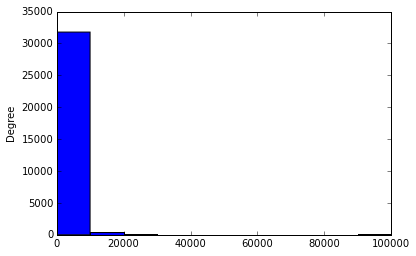

In [31]:
train['capital-gain'].plot(kind='hist')

In [36]:
capital_gain_not_zero = train['capital-gain'][train['capital-gain']!=0]

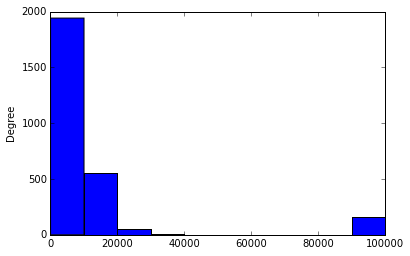

In [37]:
capital_gain_not_zero.plot(kind='hist')

####Capital Loss

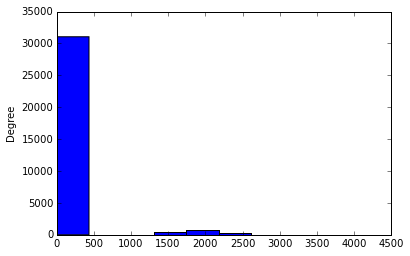

In [32]:
train['capital-loss'].plot(kind='hist')

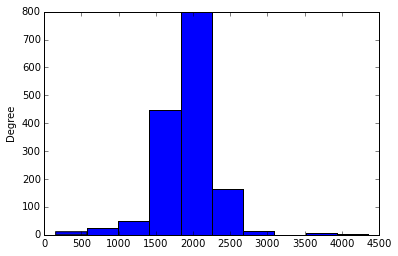

In [38]:
capital_loss_not_zero = train['capital-loss'][train['capital-loss']!=0]
capital_loss_not_zero.plot(kind='hist')

####Hours Per Week

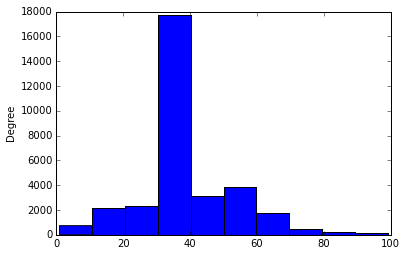

In [39]:
train['hours-per-week'].plot(kind='hist')

####Native Countries

In [78]:
countries = train['native-country'].unique().tolist()
for item in countries:
    print(item,":", len(train['native-country'][train['native-country'] == item]))

United-States : 29170
Cuba : 95
Jamaica : 81
India : 100
nan : 0
Mexico : 643
South : 80
Puerto-Rico : 114
Honduras : 13
England : 90
Canada : 121
Germany : 137
Iran : 43
Philippines : 198
Italy : 73
Poland : 60
Columbia : 59
Cambodia : 19
Thailand : 18
Ecuador : 28
Laos : 18
Taiwan : 51
Haiti : 44
Portugal : 37
Dominican-Republic : 70
El-Salvador : 106
France : 29
Guatemala : 64
China : 75
Japan : 62
Yugoslavia : 16
Peru : 31
Outlying-US(Guam-USVI-etc) : 14
Scotland : 12
Trinadad&Tobago : 19
Greece : 29
Nicaragua : 34
Vietnam : 67
Hong : 20
Ireland : 24
Hungary : 13
Holand-Netherlands : 1
